In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import matplotlib.pyplot as plt

# TensorFlow and Keras
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
# Construct a tf.data.Dataset
(train_images, train_labels), (test_images, test_labels) = tfds.as_numpy(tfds.load(
    'fashion_mnist',
    split=['train', 'test'],
    batch_size=-1,
    as_supervised=True,
))

train_images = np.squeeze(train_images)
test_images = np.squeeze(test_images)

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [3]:
print("Training dataset shape =", train_images.shape)
print("Training labels length =", len(train_labels))
print("Some training labels =", train_labels[:5])
print("Test dataset shape =", test_images.shape)
print("Test labels length =", len(test_labels))

Training dataset shape = (60000, 28, 28)
Training labels length = 60000
Some training labels = [2 1 8 4 1]
Test dataset shape = (10000, 28, 28)
Test labels length = 10000


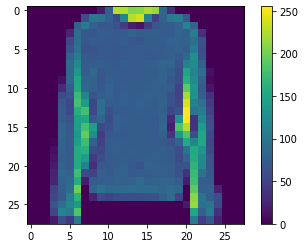

In [4]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0

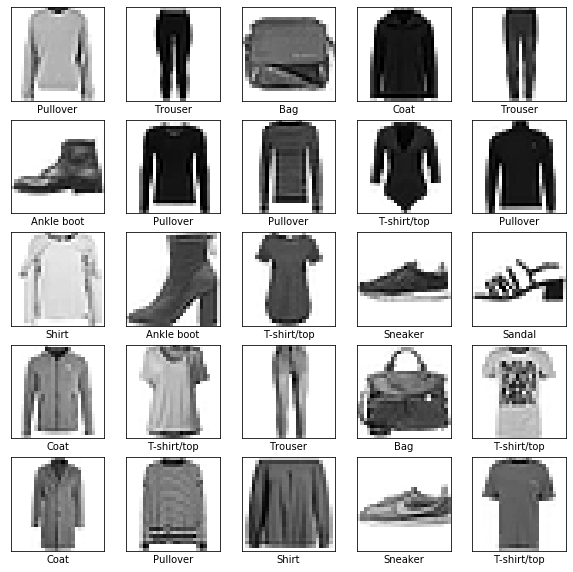

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(classes[train_labels[i]])
plt.show()

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [9]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 187us/sample - loss: 0.5041 - accuracy: 0.8217
Epoch 2/10
60000/60000 [==============================] - 10s 160us/sample - loss: 0.3789 - accuracy: 0.8637
Epoch 3/10
60000/60000 [==============================] - 9s 146us/sample - loss: 0.3389 - accuracy: 0.8764
Epoch 4/10
60000/60000 [==============================] - 9s 149us/sample - loss: 0.3127 - accuracy: 0.8857
Epoch 5/10
60000/60000 [==============================] - 10s 160us/sample - loss: 0.2965 - accuracy: 0.8903
Epoch 6/10
60000/60000 [==============================] - 9s 158us/sample - loss: 0.2796 - accuracy: 0.8974
Epoch 7/10
60000/60000 [==============================] - 10s 161us/sample - loss: 0.2695 - accuracy: 0.9001
Epoch 8/10
60000/60000 [==============================] - 10s 168us/sample - loss: 0.2580 - accuracy: 0.9045
Epoch 9/10
60000/60000 [==============================] - 10s 161us/sample - loss: 0.2465 - accuracy: 0.9071

In [10]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_accuracy)

10000/10000 - 1s - loss: 0.3263 - accuracy: 0.8832

Test accuracy: 0.8832


In [11]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
print(predictions[0:3])

[[3.2638138e-06 9.1252552e-08 7.9558520e-03 1.5891729e-06 9.4695610e-01
  1.4927481e-07 4.5081493e-02 1.0665864e-10 1.4861736e-06 7.6905655e-09]
 [7.9370176e-07 1.9923261e-09 3.0992716e-03 2.2373053e-08 8.6428416e-01
  9.8181619e-12 1.3261579e-01 2.8925541e-13 2.2656552e-09 8.1033376e-09]
 [3.9382885e-06 1.1218304e-07 1.6189932e-06 2.0028527e-07 5.0073730e-05
  5.5124468e-01 7.2515973e-06 2.8676933e-03 1.3929414e-06 4.4582304e-01]]


In [12]:
print("Class ID, predicted | real =", np.argmax(predictions[0]), "|", test_labels[0])

Class ID, predicted | real = 4 | 4


In [13]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(classes[predicted_label],
                                  100*np.max(predictions_array),
                                  classes[true_label]),
                                  color=color)

In [14]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

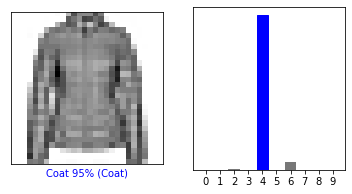

In [15]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

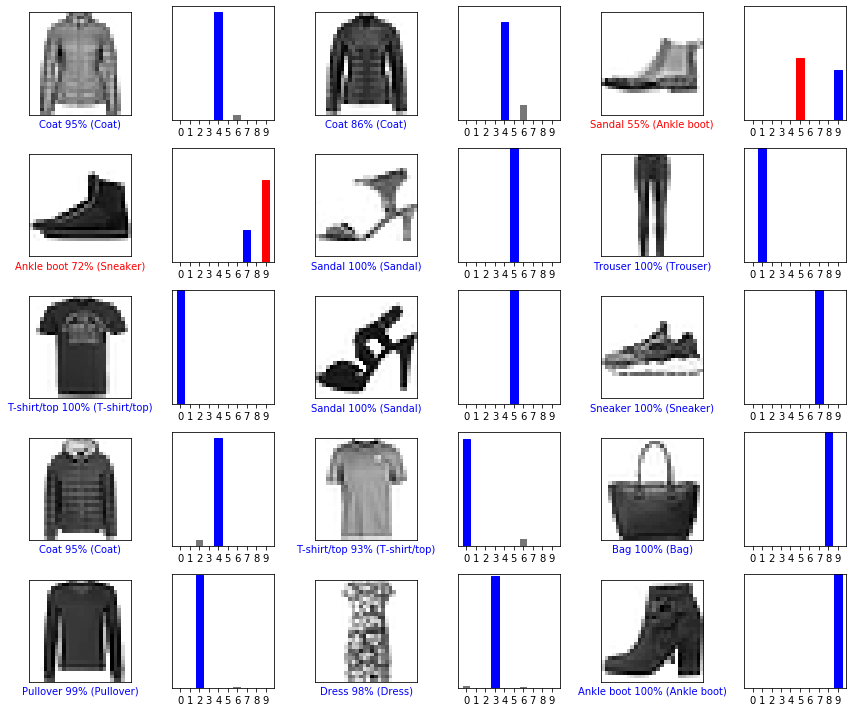

In [16]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()